<a href="https://colab.research.google.com/github/Sadrasadeghi/Analysis-of-Pumped-Hydro-Energy-Storage-in-Great-Britain-s-Electrical-Network/blob/main/PHES_Daily_Generation_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



In [ ]:
# select dataframe 
df = pd.read_csv('espeni.csv')
df.head()

,ELEXM_SETTLEMENT_DATE,ELEXM_SETTLEMENT_PERIOD,ELEXM_utc,ELEXM_localtime,ELEXM_ROWFLAG,NGEM_ROWFLAG,POWER_ESPENI_MW,POWER_ELEXM_CCGT_MW,POWER_ELEXM_OIL_MW,POWER_ELEXM_COAL_MW,...,POWER_ELEXM_BIOMASS_POSTCALC_MW,POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW,POWER_NGEM_EMBEDDED_WIND_GENERATION_MW,POWER_NGEM_BRITNED_FLOW_MW,POWER_NGEM_EAST_WEST_FLOW_MW,POWER_NGEM_MOYLE_FLOW_MW,POWER_NGEM_NEMO_FLOW_MW,POWER_NGEM_IFA_FLOW_MW,POWER_NGEM_IFA2_FLOW_MW,POWER_NGEM_NSL_FLOW_MW
0,05/11/2008,43,2008-11-05T21:00:00+00:00,2008-11-05T21:00:00+00:00,1,1,44020,16468,0,19525,...,0,0,129,0,0,-59,NaN,1355,NaN,NaN
1,05/11/2008,44,2008-11-05T21:30:00+00:00,2008-11-05T21:30:00+00:00,1,1,42169,15240,0,18892,...,0,0,71,0,0,-59,NaN,1386,NaN,NaN
2,05/11/2008,45,2008-11-05T22:00:00+00:00,2008-11-05T22:00:00+00:00,1,1,40228,14402,0,18154,...,0,0,71,0,0,-59,NaN,1361,NaN,NaN
3,05/11/2008,46,2008-11-05T22:30:00+00:00,2008-11-05T22:30:00+00:00,1,1,38349,13170,0,17843,...,0,0,40,0,0,-59,NaN,1361,NaN,NaN
4,05/11/2008,47,2008-11-05T23:00:00+00:00,2008-11-05T23:00:00+00:00,1,1,37640,12520,0,17339,...,0,0,40,0,0,-59,NaN,1841,NaN,NaN


In [ ]:
df['ELEXM_utc'] = pd.to_datetime(df['ELEXM_utc'], utc=True)
df['YEAR'] = df['ELEXM_utc'].dt.year
df['DAY'] = df['ELEXM_utc'].dt.dayofyear

df_daily = df.groupby(['YEAR', 'DAY']).sum()

df_daily['ENERGY_ELEXM_PHES_GWh'] = (df_daily['POWER_ELEXM_PS_MW']*0.5)/1000

df.head()

<ipython-input-5-cb6d20c2e45b>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.groupby(['YEAR', 'DAY']).sum()


,ELEXM_SETTLEMENT_DATE,ELEXM_SETTLEMENT_PERIOD,ELEXM_utc,ELEXM_localtime,ELEXM_ROWFLAG,NGEM_ROWFLAG,POWER_ESPENI_MW,POWER_ELEXM_CCGT_MW,POWER_ELEXM_OIL_MW,POWER_ELEXM_COAL_MW,...,POWER_NGEM_EMBEDDED_WIND_GENERATION_MW,POWER_NGEM_BRITNED_FLOW_MW,POWER_NGEM_EAST_WEST_FLOW_MW,POWER_NGEM_MOYLE_FLOW_MW,POWER_NGEM_NEMO_FLOW_MW,POWER_NGEM_IFA_FLOW_MW,POWER_NGEM_IFA2_FLOW_MW,POWER_NGEM_NSL_FLOW_MW,YEAR,DAY
0,05/11/2008,43,2008-11-05 21:00:00+00:00,2008-11-05T21:00:00+00:00,1,1,44020,16468,0,19525,...,129,0,0,-59,NaN,1355,NaN,NaN,2008,310
1,05/11/2008,44,2008-11-05 21:30:00+00:00,2008-11-05T21:30:00+00:00,1,1,42169,15240,0,18892,...,71,0,0,-59,NaN,1386,NaN,NaN,2008,310
2,05/11/2008,45,2008-11-05 22:00:00+00:00,2008-11-05T22:00:00+00:00,1,1,40228,14402,0,18154,...,71,0,0,-59,NaN,1361,NaN,NaN,2008,310
3,05/11/2008,46,2008-11-05 22:30:00+00:00,2008-11-05T22:30:00+00:00,1,1,38349,13170,0,17843,...,40,0,0,-59,NaN,1361,NaN,NaN,2008,310
4,05/11/2008,47,2008-11-05 23:00:00+00:00,2008-11-05T23:00:00+00:00,1,1,37640,12520,0,17339,...,40,0,0,-59,NaN,1841,NaN,NaN,2008,310


# Daily generation analysis of PHES

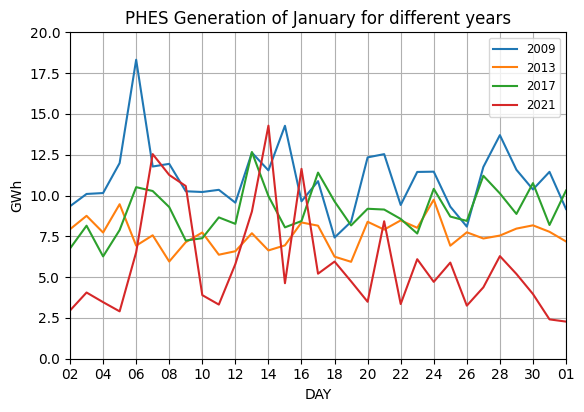

In [ ]:
# select years that wil be compared for January (DAY <= 31), & plot
ax = df_daily['ENERGY_ELEXM_PHES_GWh'].loc[(df_daily.index.get_level_values('YEAR') == 2009) & (df_daily.index.get_level_values('DAY') <= 31)].unstack(level=0).plot(kind='line')
df_daily['ENERGY_ELEXM_PHES_GWh'].loc[(df_daily.index.get_level_values('YEAR') == 2013) & (df_daily.index.get_level_values('DAY') <= 31)].unstack(level=0).plot(ax=ax)
df_daily['ENERGY_ELEXM_PHES_GWh'].loc[(df_daily.index.get_level_values('YEAR') == 2017) & (df_daily.index.get_level_values('DAY') <= 31)].unstack(level=0).plot(ax=ax)
df_daily['ENERGY_ELEXM_PHES_GWh'].loc[(df_daily.index.get_level_values('YEAR') == 2021) & (df_daily.index.get_level_values('DAY') <= 31)].unstack(level=0).plot(ax=ax)

# format plot limits, margins, title etc
plt.ylim([0, 20])
plt.grid()
plt.title('PHES Generation of January for different years')
plt.ylabel('GWh')
plt.margins(x=0)
plt.legend(fontsize='small')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gcf().autofmt_xdate()
plt.xticks(rotation=0, ha='center'); 

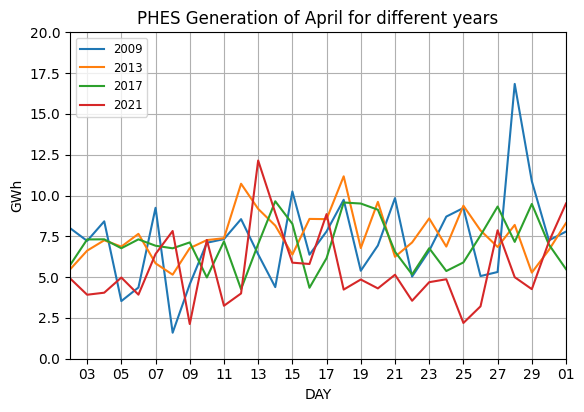

In [ ]:
#  April

ax = df_daily['ENERGY_ELEXM_PHES_GWh'].loc[(df_daily.index.get_level_values('YEAR')==2009)&((df_daily.index.get_level_values('DAY')<=120)&(df_daily.index.get_level_values('DAY')>=91))].unstack(level=0).plot(kind='line')
df_daily['ENERGY_ELEXM_PHES_GWh'].loc[(df_daily.index.get_level_values('YEAR')==2013)&((df_daily.index.get_level_values('DAY')<=120)&(df_daily.index.get_level_values('DAY')>=91))].unstack(level=0).plot(ax=ax)
df_daily['ENERGY_ELEXM_PHES_GWh'].loc[(df_daily.index.get_level_values('YEAR')==2017)&((df_daily.index.get_level_values('DAY')<=120)&(df_daily.index.get_level_values('DAY')>=91))].unstack(level=0).plot(ax=ax)
df_daily['ENERGY_ELEXM_PHES_GWh'].loc[(df_daily.index.get_level_values('YEAR')==2021)&((df_daily.index.get_level_values('DAY')<=120)&(df_daily.index.get_level_values('DAY')>=91))].unstack(level=0).plot(ax=ax)

# format plot limits, margins, title etc
plt.ylim([0, 20])
plt.grid()
plt.title('PHES Generation of April for different years')
plt.ylabel('GWh')
plt.margins(x=0)
plt.legend(fontsize='small')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gcf().autofmt_xdate()
plt.xticks(rotation=0, ha='center');